In [1]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import f1_score, precision_score, recall_score
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
X_train = pd.read_csv('agg_Xtrain.csv')
X_test = pd.read_csv('agg_Xtest.csv')
y_train = pd.read_csv('agg_ytrain.csv')
y_test = pd.read_csv('agg_ytest.csv')

In [3]:
X_train = X_train.set_index('Unnamed: 0')
X_test = X_test.set_index('Unnamed: 0')
y_train = y_train.set_index('Unnamed: 0')
y_test = y_test.set_index('Unnamed: 0')

In [4]:

tscv = TimeSeriesSplit(n_splits=10) #maybe k fold? or timeseries?

#parameters = {'var_smoothing': np.logspace(0,-9, num=100)}

cnb = ComplementNB()
#clf = GridSearchCV(gnb, param_grid=parameters, cv=tscv)

In [6]:
%%time
#gnb.set_params(**clf.best_params_)
cnb.fit(X_train,y_train)
pred = cnb.predict(X_test)
f1 = f1_score(y_test, pred, average='micro')
precision = precision_score(y_test, pred, average='micro')
recall = recall_score(y_test, pred, average='micro')

print(f"precision: {precision}, recall: {recall}, f1score: {f1}")

precision: 0.23809523809523808, recall: 0.23809523809523808, f1score: 0.23809523809523808
CPU times: total: 15.6 ms
Wall time: 16.8 ms


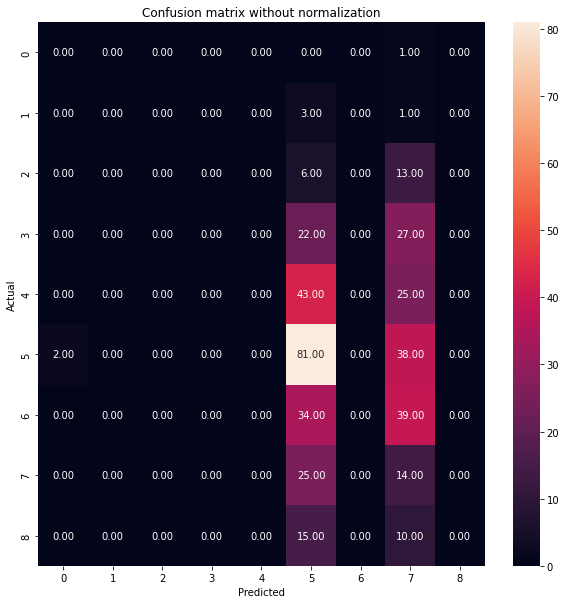

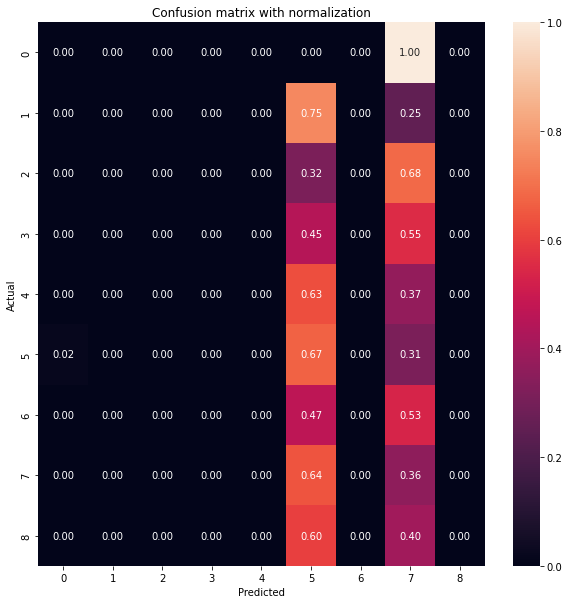

In [7]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


matrix = confusion_matrix(y_test, pred)
matrix_normalized = confusion_matrix(y_test, pred, normalize='true')

fig1, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix, annot=True, fmt='.2f')
plt.title('Confusion matrix without normalization')
plt.ylabel('Actual')
plt.xlabel('Predicted')

fig2, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix_normalized, annot=True, fmt='.2f')
plt.title('Confusion matrix with normalization')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [8]:
y_test.value_counts()

readiness
5.0          121
6.0           73
4.0           68
3.0           49
7.0           39
8.0           25
2.0           19
1.0            4
0.0            1
dtype: int64

In [9]:
y_train.value_counts()

readiness
5.0          337
4.0          194
6.0          185
7.0          162
3.0          113
0.0           66
8.0           55
2.0           48
1.0            8
9.0            4
10.0           3
dtype: int64

In [10]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

X_test5 = X_test.loc[y_test[y_test['readiness']==5].index]
X_test5

,calories,distance,l_act,m_act,resting_heart,sedentary,sleep_overall_score,sleep_composition_score,sleep_revitalization_score,sleep_duration_score,deep_sleep_in_minutes,sleep_resting_heart_rate,sleep_restlessness,sleep_duration,sleep_minutesToFallAsleep,sleep_minutesAsleep,sleep_minutesAwake,sleep_minutesAfterWakeup,sleep_timeInBed,sleep_efficiency,main_sleep,steps,hr_below_zone1,hr_zone1,hr_zone3,hr_zone2,v_act,age,height,gender,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-28,3630.110,1010310.0,347.0,9.0,55.253295,710.0,71.000000,21.000000,15.000000,35.000000,57.000000,54.000000,0.082739,2.148000e+07,0.0,318.000000,40.000000,0.000000,358.000000,94.000000,1.0,12513.0,1313.000000,93.000000,0.000000,0.000000,16.0,48,195,0,0,0,0,0,1,0,0
2020-02-28,2535.910,496690.0,224.0,0.0,47.861389,853.0,61.000000,16.000000,21.000000,24.000000,31.000000,49.000000,0.125673,8.880000e+06,0.0,147.000000,1.000000,0.000000,148.000000,99.000000,0.0,6665.0,25.000000,1393.000000,0.000000,0.000000,0.0,60,180,0,0,0,0,0,1,0,0
2020-02-28,2023.160,670540.0,266.0,11.0,72.054908,667.0,73.000000,20.000000,12.000000,41.000000,85.000000,70.000000,0.157513,2.892000e+07,0.0,424.000000,58.000000,0.000000,482.000000,89.000000,1.0,9925.0,0.000000,0.000000,127.000000,1307.000000,14.0,26,163,1,0,0,0,0,1,0,0
2020-02-28,2078.910,76240.0,28.0,0.0,63.187122,1412.0,79.780952,20.152381,21.923810,37.704762,66.247619,64.323810,0.062581,2.439029e+07,0.0,364.190476,41.742857,2.333333,406.504762,95.628571,1.0,1046.0,12.000000,0.000000,0.000000,123.000000,0.0,35,176,0,0,0,0,0,1,0,0
2020-02-28,3695.540,1092370.0,497.0,31.0,48.975348,543.0,81.000000,21.000000,23.000000,37.000000,61.000000,50.000000,0.061196,2.160000e+07,0.0,324.000000,36.000000,0.000000,360.000000,97.000000,1.0,14736.0,1388.000000,43.000000,2.000000,0.000000,9.0,42,179,1,0,0,0,0,1,0,0
2020-02-28,3179.080,1848250.0,198.0,21.0,59.130889,604.0,81.000000,23.000000,19.000000,39.000000,117.000000,57.000000,0.093067,3.156000e+07,0.0,454.000000,72.000000,0.000000,526.000000,94.000000,1.0,19354.0,0.000000,1185.000000,108.000000,38.000000,91.0,26,177,0,0,0,0,0,1,0,0
2020-02-28,4254.620,1960530.0,198.0,38.0,57.548124,557.0,72.000000,16.000000,14.000000,42.000000,64.000000,55.000000,0.077458,3.018000e+07,0.0,449.000000,54.000000,0.000000,503.000000,95.000000,1.0,21571.0,1220.000000,147.000000,26.000000,1.000000,144.0,27,186,0,0,0,0,0,1,0,0
2020-02-28,2880.790,509350.0,176.0,18.0,61.070694,1238.0,74.382022,18.910112,19.348315,36.123596,85.921348,61.033708,0.110716,3.038835e+07,0.0,426.879121,79.340659,3.000000,506.472527,92.615385,1.0,6726.0,1.000000,509.000000,0.000000,72.000000,8.0,26,180,0,0,0,0,0,1,0,0
2020-02-28,1552.580,46540.0,34.0,0.0,66.293698,860.0,73.000000,19.000000,14.000000,40.000000,94.000000,65.000000,0.116279,3.276000e+07,0.0,477.000000,69.000000,1.000000,546.000000,88.000000,1.0,632.0,0.000000,18.000000,470.000000,0.000000,0.0,38,179,1,0,0,0,0,1,0,0


In [11]:
y_test[y_test['readiness']==5].index

Index(['2020-02-28', '2020-02-23', '2020-02-24', '2020-02-27', '2020-03-03',
       '2020-03-05', '2020-03-06', '2020-03-10', '2020-03-16', '2020-03-24',
       ...
       '2020-03-19', '2020-03-22', '2020-03-29', '2020-02-21', '2020-03-16',
       '2020-03-29', '2020-02-01', '2020-02-11', '2020-02-12', '2020-02-15'],
      dtype='object', name='Unnamed: 0', length=121)

In [12]:
pred_index = pd.DataFrame(pred).set_index(y_test.index)

investigate = []
for i in y_test[y_test['readiness']==5].index:
    if i in pred_index[pred_index[0]==0].index:
        investigate.append(X_test5.loc[i])
    else:
        pass
        
pd.concat(investigate)

,calories,distance,l_act,m_act,resting_heart,sedentary,sleep_overall_score,sleep_composition_score,sleep_revitalization_score,sleep_duration_score,deep_sleep_in_minutes,sleep_resting_heart_rate,sleep_restlessness,sleep_duration,sleep_minutesToFallAsleep,sleep_minutesAsleep,sleep_minutesAwake,sleep_minutesAfterWakeup,sleep_timeInBed,sleep_efficiency,main_sleep,steps,hr_below_zone1,hr_zone1,hr_zone3,hr_zone2,v_act,age,height,gender,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-02,3266.510,913105.0,252.0,13.0,54.617097,748.0,77.000000,20.000000,19.000000,38.000000,37.000000,54.000000,0.072611,2.448000e+07,0.0,366.000000,42.000000,5.000000,408.000000,94.000000,1.0,11335.0,1336.000000,77.000000,0.000000,0.000000,19.0,48,195,0,1,0,0,0,0,0,0
2020-03-02,4132.790,978070.0,139.0,28.0,45.150108,622.0,76.000000,22.000000,17.000000,37.000000,81.000000,46.000000,0.185109,2.898000e+07,0.0,416.000000,67.000000,0.000000,483.000000,96.000000,1.0,23021.0,128.000000,1227.000000,55.000000,18.000000,168.0,60,180,0,1,0,0,0,0,0,0
2020-03-02,1374.490,18220.0,26.0,0.0,76.763331,478.0,70.000000,19.000000,10.000000,41.000000,121.000000,74.000000,0.192232,4.554000e+07,0.0,628.000000,131.000000,0.000000,759.000000,93.000000,1.0,273.0,0.000000,0.000000,14.000000,1417.000000,0.0,26,163,1,1,0,0,0,0,0,0
2020-03-02,3666.670,835610.0,308.0,39.0,59.800104,1064.0,79.780952,20.152381,21.923810,37.704762,66.247619,64.323810,0.062581,2.439029e+07,0.0,364.190476,41.742857,0.333333,406.504762,95.628571,1.0,11468.0,181.000000,0.000000,0.000000,1238.000000,29.0,35,176,0,1,0,0,0,0,0,0
2020-03-02,3638.080,977580.0,360.0,40.0,51.033323,529.0,81.000000,19.000000,20.000000,42.000000,94.000000,50.000000,0.057332,2.814000e+07,0.0,409.000000,60.000000,0.000000,469.000000,97.000000,1.0,13185.0,1337.000000,86.000000,9.000000,0.000000,42.0,42,179,1,1,0,0,0,0,0,0
2020-03-02,2587.630,583410.0,299.0,0.0,57.914259,465.0,87.000000,20.000000,23.000000,44.000000,136.000000,60.000000,0.056171,4.056000e+07,0.0,598.000000,78.000000,0.000000,676.000000,94.000000,1.0,7956.0,0.000000,1335.000000,52.000000,0.000000,0.0,26,177,0,1,0,0,0,0,0,0
2020-03-02,3914.990,1373040.0,295.0,19.0,55.877496,582.0,72.000000,15.000000,19.000000,38.000000,50.000000,56.000000,0.075245,2.844000e+07,0.0,407.000000,67.000000,0.000000,474.000000,94.000000,1.0,17074.0,1303.000000,85.000000,16.000000,4.000000,70.0,27,186,0,1,0,0,0,0,0,0
2020-03-02,2803.230,417630.0,176.0,28.0,63.983589,734.0,70.000000,17.000000,21.000000,32.000000,62.000000,66.000000,0.136364,2.994000e+07,0.0,400.000000,99.000000,0.000000,499.000000,88.000000,1.0,5604.0,0.000000,1114.000000,0.000000,93.000000,3.0,26,180,0,1,0,0,0,0,0,0
2020-03-02,2319.240,566610.0,276.0,3.0,64.238930,691.0,72.000000,17.000000,13.000000,42.000000,76.000000,61.000000,0.101402,2.778000e+07,0.0,421.000000,42.000000,0.000000,463.000000,96.000000,1.0,7996.0,0.000000,44.000000,1349.000000,0.000000,7.0,25,171,1,1,0,0,0,0,0,0
